<a href="https://colab.research.google.com/github/saravananmaran/ALDS/blob/main/Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EXNO 4.1 (Text_analytics for CHATBOT)



In [ ]:
import pickle
import numpy as np
import tensorflow

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
with open("train_qa.txt","rb") as fp:
  train_data = pickle.load(fp)

In [ ]:
with open("test_qa.txt","rb") as fp:
  test_data = pickle.load(fp)

In [ ]:
type(test_data)

list

In [ ]:
type(train_data)

list

In [ ]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [ ]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [ ]:
' '.join(train_data[0][2])

'n o'

In [ ]:
len(test_data)

1000

In [ ]:
len(train_data)

10000

In [ ]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [ ]:
vocab = set()

In [ ]:
all_data = test_data + train_data

In [ ]:
for story,question,answer in all_data:
  vocab = vocab.union(set(story))
  vocab = vocab.union(set(question))

In [114]:
vocab.add('no')
vocab.add('yes')
vocab.add('<unk>') # Add the unknown token to the vocabulary

In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [116]:
vocab_len = len(tokenizer.word_index) + 1 # Use tokenizer's word_index length including <unk>

In [ ]:
max_story_len = max([len(data[0]) for data in all_data])

In [ ]:
max_story_len

156

In [ ]:
max_question_len = max([len(data[1]) for data in all_data])

In [ ]:
max_question_len

6

In [ ]:
vocab


{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

## ANN ALGORITHM


In [ ]:
import keras

In [ ]:
!pip install keras --user

In [ ]:
from keras.preprocessing.sequence import pad_sequences


In [ ]:
text = ['Mary moved to the bathroom . Sandra journeyed to the bedroom .']

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=18)

In [ ]:
tokenizer.fit_on_texts(text)

In [ ]:
sequences = tokenizer.texts_to_sequences(text)

In [115]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(list(vocab)) # Fit tokenizer on the updated vocab including <unk>

In [ ]:
tokenizer.word_index

{'there': 1,
 'got': 2,
 'took': 3,
 'discarded': 4,
 'moved': 5,
 'office': 6,
 'is': 7,
 '.': 8,
 'john': 9,
 'left': 10,
 'journeyed': 11,
 'picked': 12,
 'kitchen': 13,
 'dropped': 14,
 '?': 15,
 'grabbed': 16,
 'put': 17,
 'hallway': 18,
 'travelled': 19,
 'bedroom': 20,
 'to': 21,
 'garden': 22,
 'football': 23,
 'daniel': 24,
 'in': 25,
 'up': 26,
 'went': 27,
 'yes': 28,
 'sandra': 29,
 'apple': 30,
 'mary': 31,
 'milk': 32,
 'back': 33,
 'no': 34,
 'bathroom': 35,
 'down': 36,
 'the': 37}

In [ ]:
train_story_text = []
train_question_text = []
train_answers = []

In [ ]:
for story,question,answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)


In [ ]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [ ]:
len(train_story_text)

10000

In [ ]:
len(train_story_seq)

10000

In [117]:
def vectorize_stories(data,word_index=None,max_story_len=max_story_len,max_question_len=max_question_len):
  if word_index is None:
      word_index = tokenizer.word_index # Use the global tokenizer

  # Get the index for unknown words, which should now be in word_index
  unk_idx = word_index.get('<unk>')
  if unk_idx is None:
      # Fallback if somehow <unk> is not in word_index (should not happen with previous fixes)
      # This might indicate a problem in tokenizer setup, but as a last resort:
      unk_idx = len(word_index) + 1 # Assign a new index if not found
      word_index['<unk>'] = unk_idx # Add it to this local word_index for this run

  X = []
  Xq = []
  Y = []
  for story,query,answer in data:
    x = [word_index.get(word.lower(), unk_idx) for word in story]
    xq = [word_index.get(word.lower(), unk_idx) for word in query]

    y = np.zeros(vocab_len) # Use the global vocab_len
    if answer.lower() in word_index:
        y[word_index[answer.lower()]] = 1
    else:
        y[unk_idx] = 1 # If answer itself is unknown, map to unk_idx
    X.append(x)
    Xq.append(xq)
    Y.append(y)
  return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))

In [ ]:
inputs_train,queries_train,answers_train = vectorize_stories(train_data)

In [ ]:
inputs_train.shape

(10000, 156)

In [ ]:
queries_train.shape

(10000, 6)

In [ ]:
answers_train.shape

(10000, 39)

In [ ]:
inputs_test,queries_test,answers_test = vectorize_stories(test_data)

In [ ]:
inputs_test

array([[ 0,  0,  0, ..., 37, 20,  8],
       [ 0,  0,  0, ..., 37, 22,  8],
       [ 0,  0,  0, ..., 37, 22,  8],
       ...,
       [ 0,  0,  0, ..., 37, 30,  8],
       [ 0,  0,  0, ..., 37, 22,  8],
       [ 0,  0,  0, ..., 30,  1,  8]], dtype=int32)

In [ ]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,
         0., 503.,   0.,   0.,   0.,   0.])

In [ ]:
tokenizer.word_index['yes']

28

In [ ]:
tokenizer.word_index['no']

34

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [ ]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [ ]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim=64))
input_encoder_m.add(Dropout(0.3))



In [ ]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [ ]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [ ]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [ ]:
match = dot([input_encoded_m,question_encoded],axes=(2,2))
match = Activation('softmax')(match)

In [ ]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [ ]:
answer = concatenate([response,question_encoded])

In [ ]:
answer = LSTM(32,return_sequences=False)(answer)

In [ ]:
answer

<KerasTensor shape=(None, 32), dtype=float32, sparse=False, ragged=False, name=keras_tensor_19>

In [ ]:

answer = Activation('softmax')(answer)
model = Model([input_sequence,question],answer)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout
from tensorflow.keras.models import Model

In [ ]:
max_len_input = inputs_train.shape[1]
max_len_query = queries_train.shape[1]

input1 = Input(shape=(max_len_input,))
x1 = Embedding(vocab_len, 64)(input1)
x1 = LSTM(32)(x1)
input2 = Input(shape=(max_len_query,))
x2 = Embedding(vocab_len, 64)(input2)
x2 = LSTM(32)(x2)
merged = concatenate([x1, input2])
output = Dense(answers_train.shape[1], activation='softmax')(merged)
model = Model(inputs=[input1, input2], outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 156)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_11        │ (None, 156, 64)   │      2,432 │ input_layer_12[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ (None, 32)        │     12,416 │ embedding_11[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_13      │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 38)        │          0 │ lstm_7[0][0],     │
│ (Concatenate)       │                   │            │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 39)        │      1,521 │ concatenate_4[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,369 (63.94 KB)

 Trainable params: 16,369 (63.94 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit([inputs_train, queries_train], answers_train, batch_size=32, epochs=30, validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.5013 - loss: 0.6972 - val_accuracy: 0.4840 - val_loss: 0.6940
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.5063 - loss: 0.6956 - val_accuracy: 0.4970 - val_loss: 0.6989
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.4980 - loss: 0.6954 - val_accuracy: 0.4970 - val_loss: 0.6945
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.5059 - loss: 0.6957 - val_accuracy: 0.5030 - val_loss: 0.6973
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.5029 - loss: 0.6972 - val_accuracy: 0.4970 - val_loss: 0.7061
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.5025 - loss: 0.6966 - val_accuracy: 0.4970 - val_loss: 0.6940
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.5026 - loss: 0.6975 - val_accuracy: 0.4970 - val_loss: 0.6956
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.5079 - loss: 0.6953 - 

In [ ]:
filename = 'chatbot_120_epochs.keras'
model.save(filename)

In [ ]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test,queries_test]))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [ ]:
story = ' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [ ]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [ ]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [112]:
val_max = np.argmax(pred_results[0])
for key,val in tokenizer.word_index.items():
  if val == val_max:
    k = key

print("Predicted answer is: ",k)
print("Probability of certainty was: ",pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.5722074


In [105]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story

'John left the kitchen . Sandra dropped the football in the garden .'

In [106]:
my_question = "Did John travelled the bathroom last friday?"

In [107]:
my_question.split()

['Did', 'John', 'travelled', 'the', 'bathroom', 'last', 'friday?']

In [108]:
mydata = [(my_story,my_question,'yes')]

In [118]:
my_story_vec, my_question_vec, my_ans_vec = vectorize_stories(mydata)

In [119]:
pred_results = model.predict(([my_story_vec, my_question_vec]))

val_max = np.argmax(pred_results[0])
k = None
for key,val in tokenizer.word_index.items():
  if val == val_max:
    k = key
    break

if k is not None:
    print("Predicted answer is: ", k)
    print("Probability of certainty was: ", pred_results[0][val_max])
else:
    print("Could not find predicted word in tokenizer.word_index")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted answer is:  yes
Probability of certainty was:  0.78219545


##EXNO 4.1 OPENCV (Image_analytics for CHATBOT)

In [120]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [121]:
from PIL import Image

In [122]:
pic = Image.open('00-puppy.jpg')

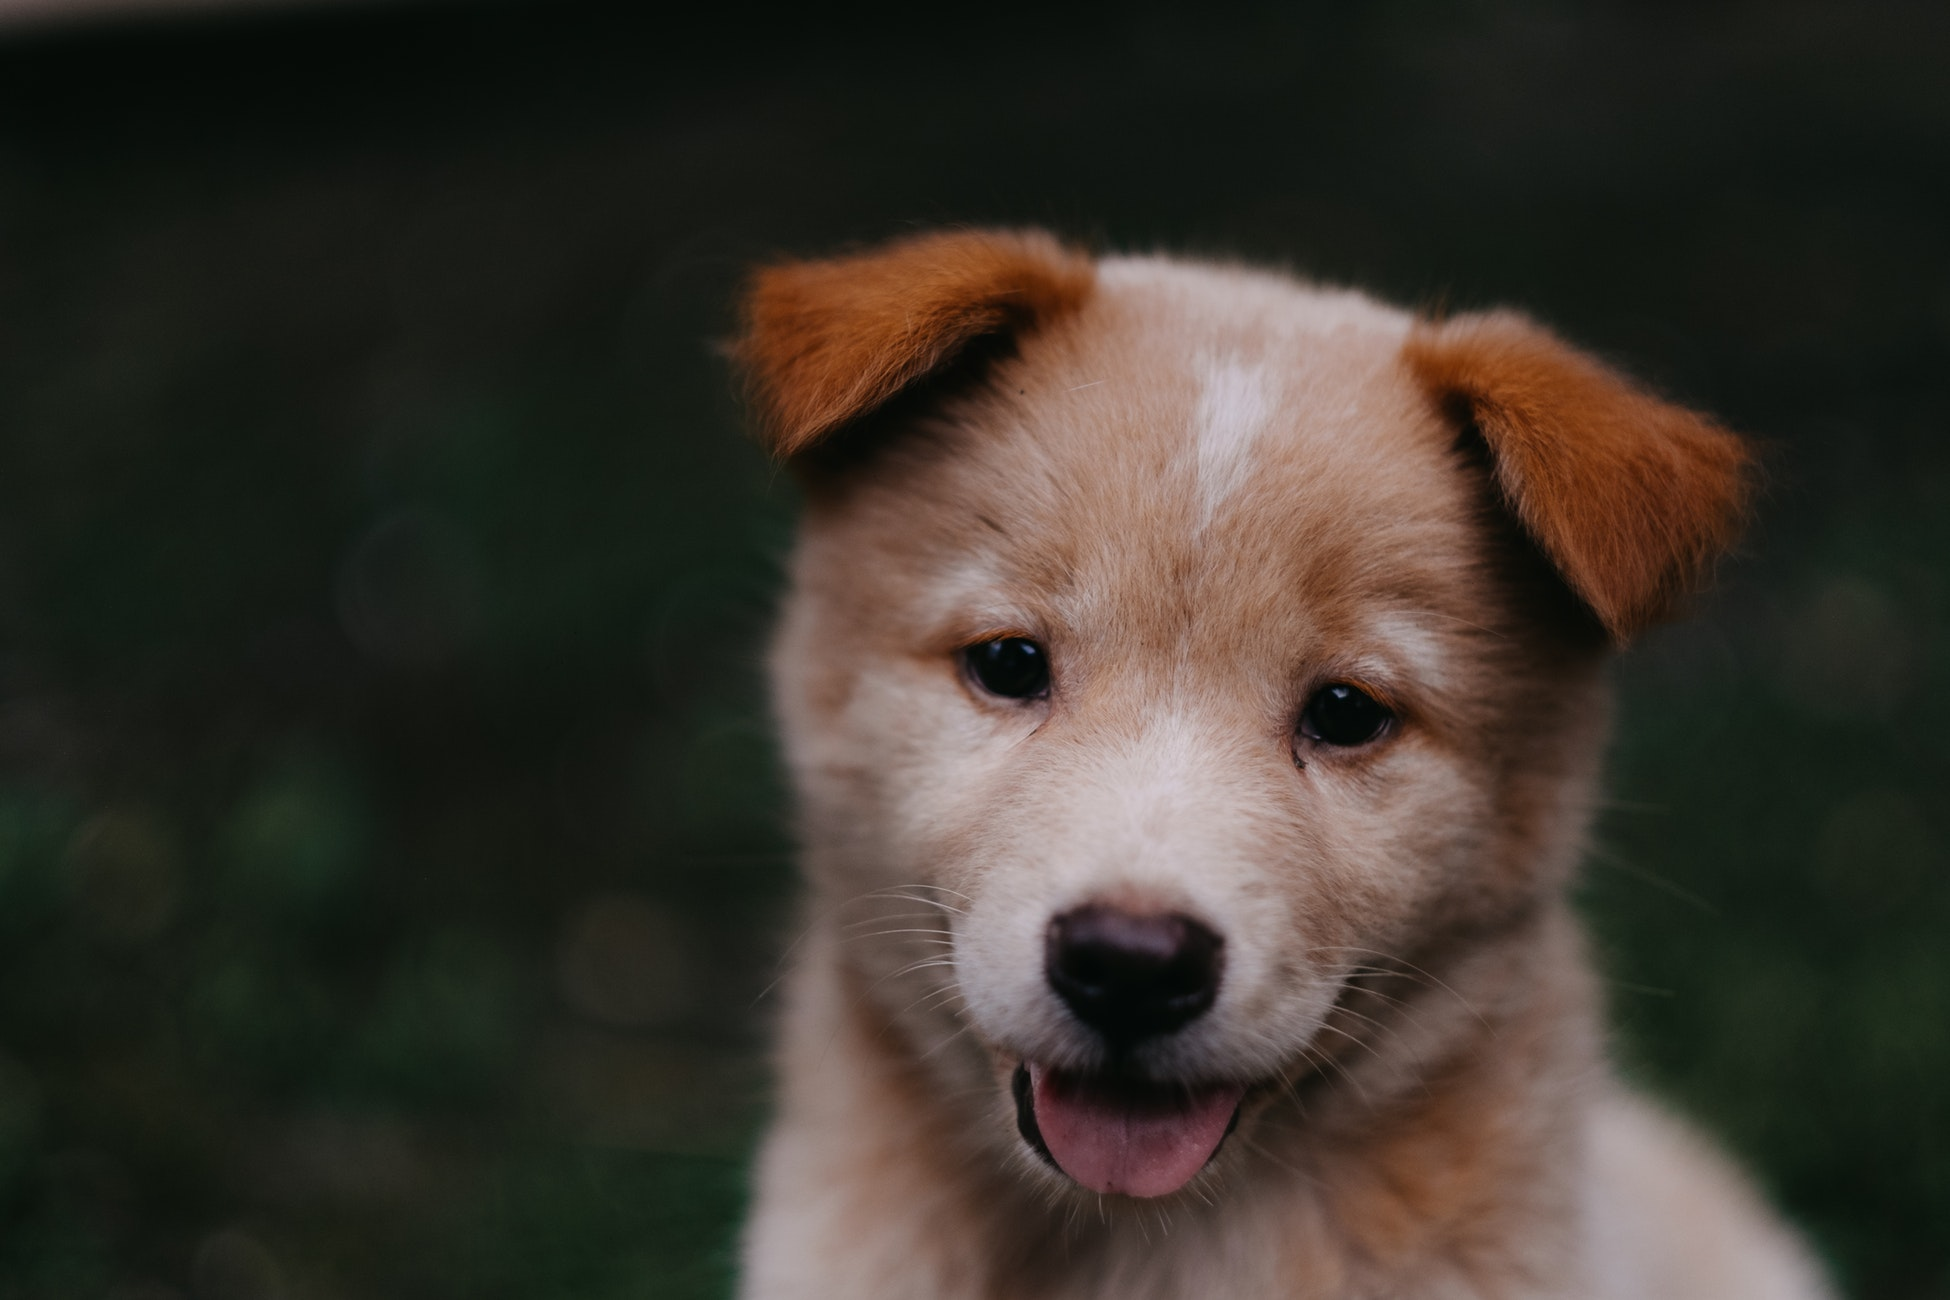

In [123]:
pic

In [124]:
type(pic)

PIL.JpegImagePlugin.JpegImageFile

In [126]:
pic_arr = np.asarray(pic)
pic_arr.shape

(1300, 1950, 3)

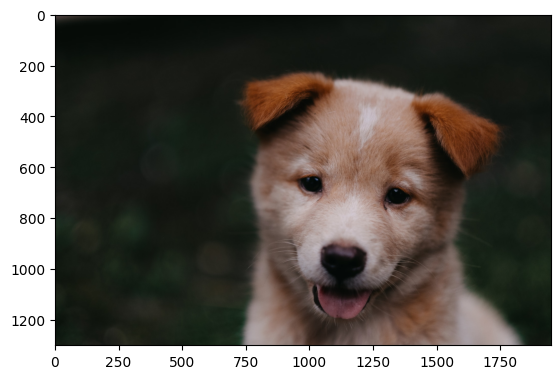

In [128]:
plt.imshow(pic_arr)
plt.show()

In [140]:
pic_red=pic_arr.copy()

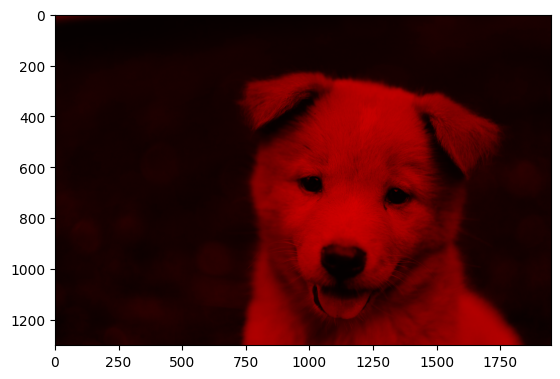

In [142]:
pic_red[:,:,1]=0
pic_red[:,:,2]=0

plt.imshow(pic_red)
plt.show()

In [143]:
pic_red=pic_arr.copy()

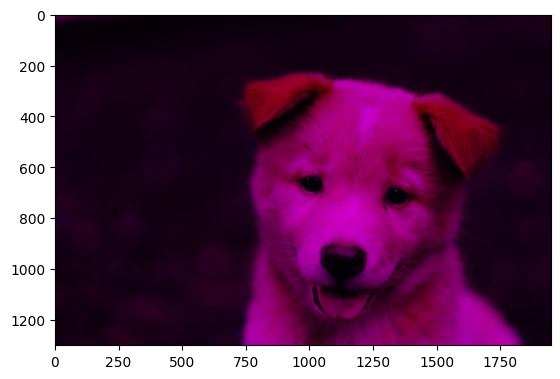

In [144]:
pic_red[:,:,1]=0


plt.imshow(pic_red)
plt.show()

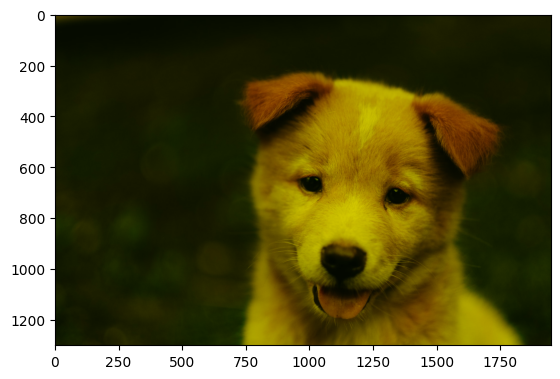

In [145]:
pic_red=pic_arr.copy()
pic_red[:,:,2]=0


plt.imshow(pic_red)
plt.show()

## USING CV


In [146]:
import cv2

In [147]:
img = cv2.imread('00-puppy.jpg')

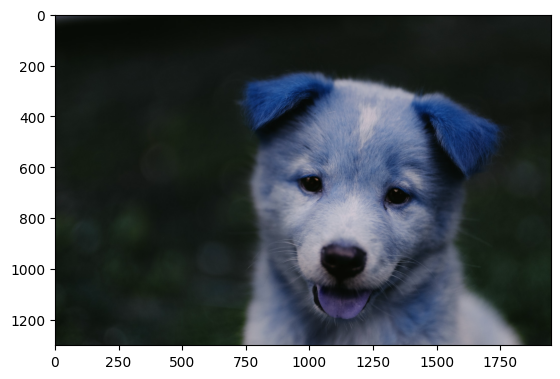

In [148]:
img_bgr = cv2.imread('00-puppy.jpg')
plt.imshow(img_bgr)
plt.show()

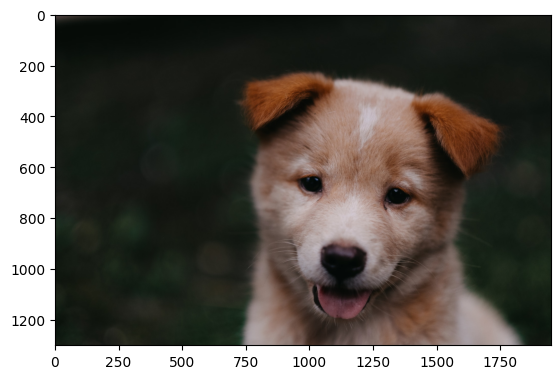

In [149]:
img_rbg=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rbg)
plt.show()

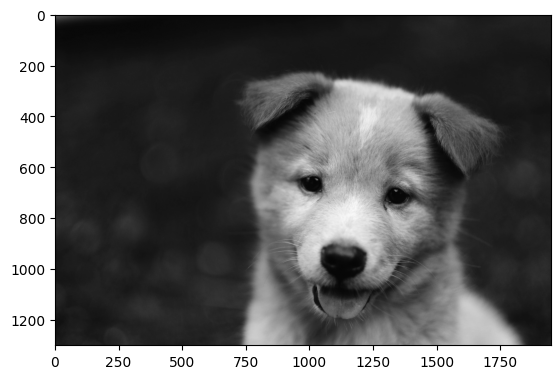

In [150]:
img_gray = cv2.imread('00-puppy.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray,cmap='gray')
plt.show()

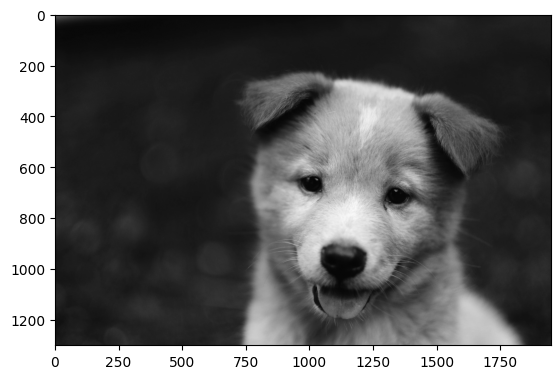

In [151]:
img_rbg.shape
img = cv2.imread('00-puppy.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')
plt.show()

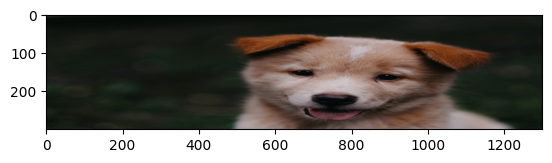

In [158]:
img_rbg.shape
img = cv2.resize(img_rbg,(1300,300))
plt.imshow(img)
plt.show()

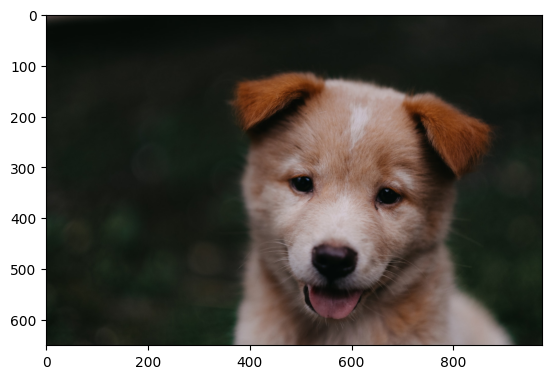

In [159]:
w_ratio = 0.5
h_ratio = 0.5
img_resized = cv2.resize(img_rbg,(0,0),img_rbg,w_ratio,h_ratio)
plt.imshow(img_resized)
plt.show()

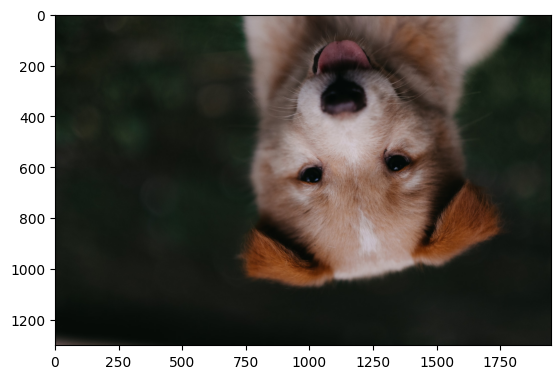

In [160]:
new_img = cv2.flip(img_rbg,0)
plt.imshow(new_img)
plt.show()

In [161]:
pwd


'/content'

In [162]:
type(new_img)

numpy.ndarray

In [163]:
cv2.imwrite('new_img.jpg',new_img)

True

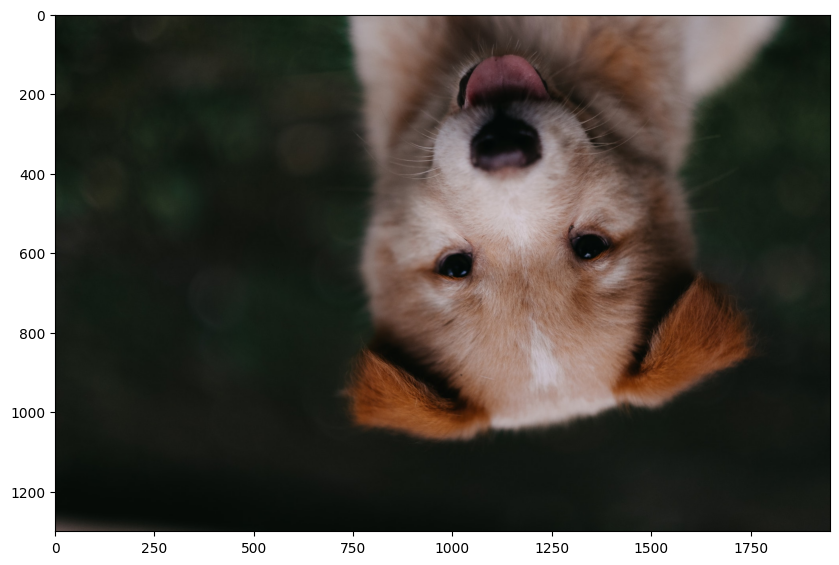

In [165]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.imshow(new_img)

plt.show()

##EXNO 4.3

In [166]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [167]:
blank_img = np.zeros(shape=(512,512,3),dtype=np.int16)

In [168]:
blank_img.shape

(512, 512, 3)

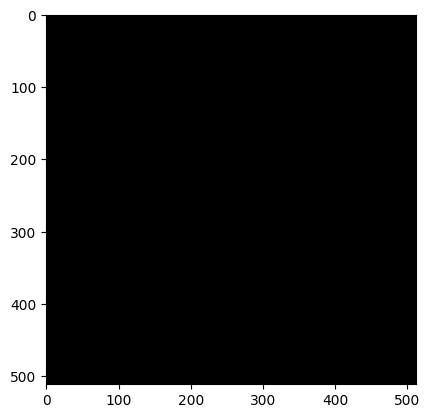

In [169]:
plt.imshow(blank_img)
plt.show()

In [170]:
cv2.rectangle(blank_img,pt1=(384,0),pt2=(510,128),color=(0,255,0),thickness=5)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

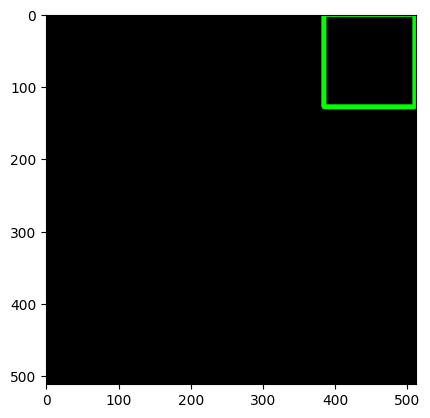

In [171]:
plt.imshow(blank_img)
plt.show()

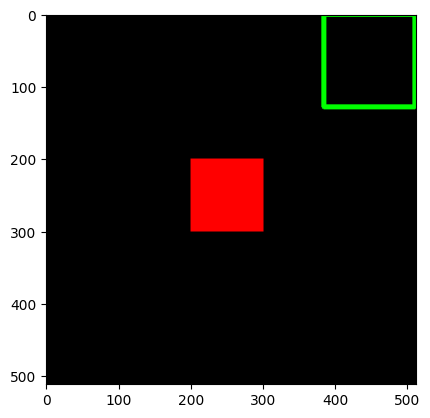

In [173]:
cv2.rectangle(blank_img,pt1=(200,200),pt2=(300,300),color=(255,0,0),thickness=-1)
plt.imshow(blank_img)
plt.show()

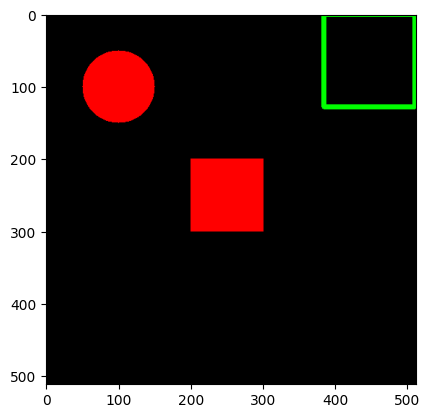

In [174]:
cv2.circle(blank_img,center=(100,100),radius=50,color=(255,0,0),thickness=-1)
plt.imshow(blank_img)
plt.show()

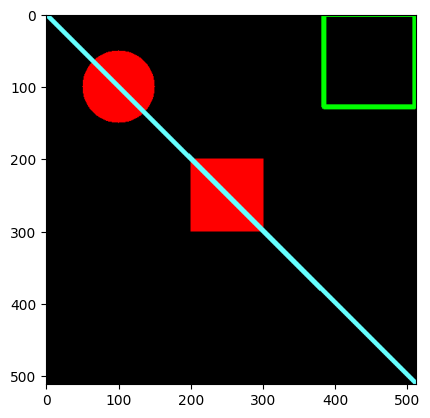

In [176]:
cv2.line(blank_img,pt1=(0,0),pt2=(512,511),color=(102,255,255),thickness=5)
plt.imshow(blank_img)
plt.show()

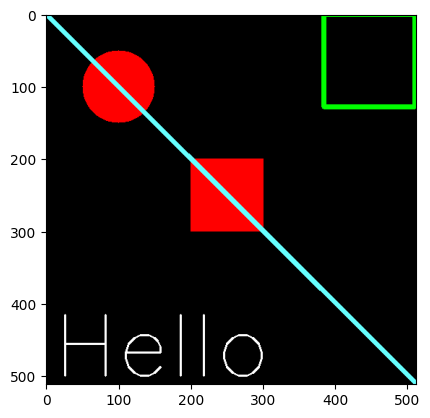

In [178]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(blank_img,text='Hello',org=(10,500),fontFace=font,fontScale=4,color=(255,255,255),thickness=2,lineType=cv2.LINE_AA)
plt.imshow(blank_img)
plt.show()

In [179]:
blank_img = np.zeros(shape=(512,512,3),dtype=np.int16)

In [180]:
vertices = np.array([[100,300],[200,200],[400,300],[200,400]],np.int32)

In [182]:
pts= vertices.reshape((-1,1,2))

In [185]:
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

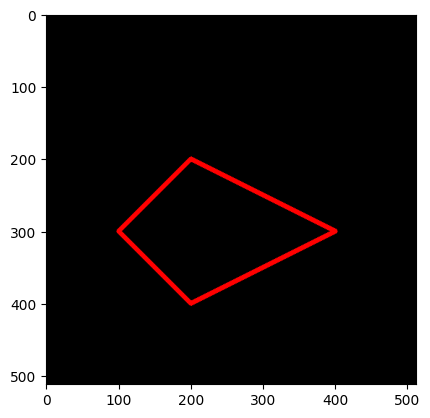

In [186]:
cv2.polylines(blank_img,[pts],isClosed=True,color=(255,0,0),thickness=5)
plt.imshow(blank_img)
plt.show()

In [190]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("dog_backpack.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

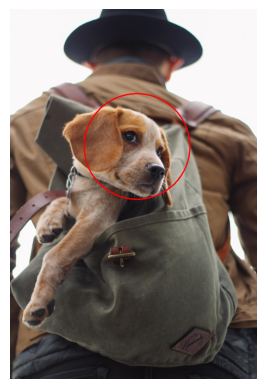

In [197]:
img = cv2.imread("dog_backpack.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.circle(img,
           center=(480, 520),
           radius=200,
           color=(255, 0, 0),   # Red
           thickness=3)
plt.imshow(img)
plt.axis("off")
plt.show()

##EXNO 4.4


In [198]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [200]:
nadia = cv2.imread('Nadia_Murad.jpg',0)
Denis= cv2.imread('Denis_Mukwege.jpg',0)
solvay= cv2.imread('solvay_conference.jpg',0)

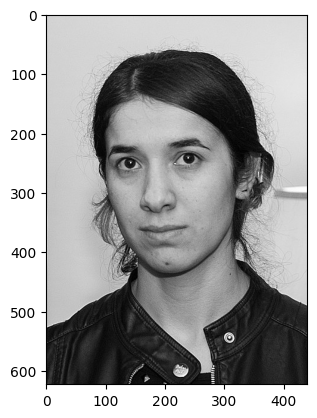

In [201]:
plt.imshow(nadia,cmap='gray')
plt.show()

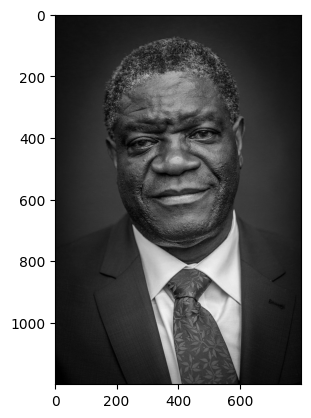

In [202]:
plt.imshow(Denis,cmap='gray')
plt.show()

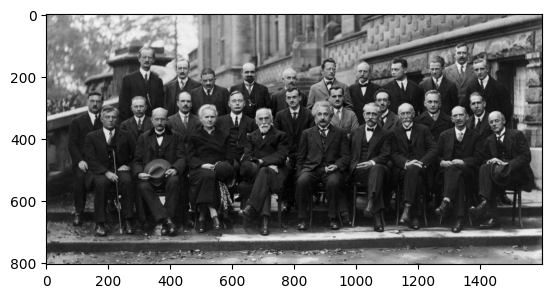

In [203]:
plt.imshow(solvay,cmap='gray')
plt.show()

In [204]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


In [205]:
def detect_face(img):
  face_img=img.copy()
  face_rects=face_cascade.detectMultiScale(face_img, scaleFactor=1.1, minNeighbors=5)
  for (x,y,w,h) in face_rects:
    cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
  return face_img

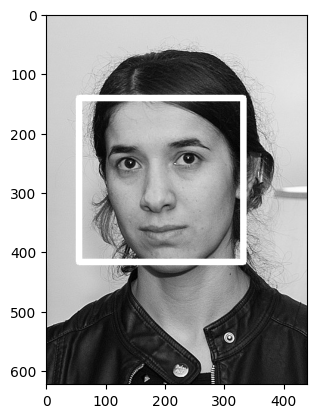

In [206]:
result = detect_face(nadia)
plt.imshow(result, cmap='gray')
plt.show()

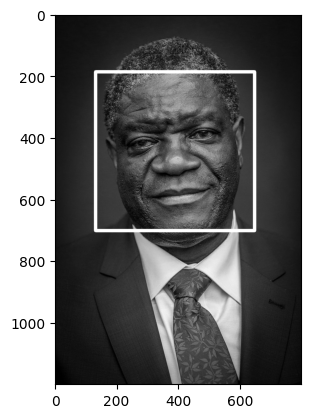

In [207]:
result = detect_face(Denis)
plt.imshow(result, cmap='gray')
plt.show()


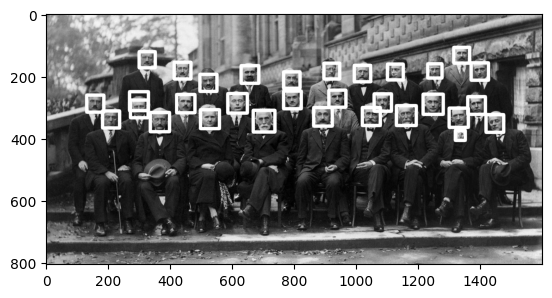

In [211]:
result = detect_face(solvay)
plt.imshow(result, cmap='gray')
plt.show()
